## TEST.PREDICTIONS BMW SALES

## LIBRERIAS

In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, f1_score, recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import precision_recall_curve, roc_curve, auc, balanced_accuracy_score
from sklearn.metrics import precision_recall_curve, classification_report

Directorio actual: /workspaces/Ciencia-de-Datos---BMW-Modelo-predictivo-ventas-2025-en-adelante./NOTEBOOKS


## Cargar la Base de Datos

## Original

In [ ]:
df_proces = pd.read_csv('../data/processed/processed.csv')
df_proces

,Model,Year,Region,Color,Fuel_Type,Transmission,Engine_Size_L,Mileage_KM,Price_USD,Sales_Classification
0,5 Series,2016,Asia,Red,Petrol,Manual,3.5,151748,98740,High
1,i8,2013,North America,Red,Hybrid,Automatic,1.6,121671,79219,Low
2,5 Series,2022,North America,Blue,Petrol,Automatic,4.5,10991,113265,Low
3,X3,2024,Middle East,Blue,Petrol,Automatic,1.7,27255,60971,Low
4,7 Series,2020,South America,Black,Diesel,Manual,2.1,122131,49898,Low
...,...,...,...,...,...,...,...,...,...,...
49995,i3,2014,Asia,Red,Hybrid,Manual,4.6,151030,42932,High
49996,i3,2023,Middle East,Silver,Electric,Manual,4.2,147396,48714,High
49997,5 Series,2010,Middle East,Red,Petrol,Automatic,4.5,174939,46126,High
49998,i3,2020,Asia,White,Electric,Automatic,3.8,3379,58566,High


In [ ]:
df_proces[["Price_USD" ]].isnull().sum()

Price_USD    0
dtype: int64

## TEST

In [ ]:
df_test = pd.read_csv('../data/test_predictions.csv')
df_test


,Model,Year,Region,Color,Fuel_Type,Transmission,Engine_Size_L,Mileage_KM,Price_USD,Real_Class,Predicted_Class,Probability_High
0,5 Series,2016,Asia,Red,Petrol,Manual,3.5,151748,98740,1,0,0.453162
1,i8,2013,North America,Red,Hybrid,Automatic,1.6,121671,79219,0,0,0.426196
2,5 Series,2022,North America,Blue,Petrol,Automatic,4.5,10991,113265,0,0,0.279677
3,X3,2024,Middle East,Blue,Petrol,Automatic,1.7,27255,60971,0,0,0.168475
4,7 Series,2020,South America,Black,Diesel,Manual,2.1,122131,49898,0,0,0.438886
...,...,...,...,...,...,...,...,...,...,...,...,...
49995,i3,2014,Asia,Red,Hybrid,Manual,4.6,151030,42932,1,1,0.734817
49996,i3,2023,Middle East,Silver,Electric,Manual,4.2,147396,48714,1,0,0.453373
49997,5 Series,2010,Middle East,Red,Petrol,Automatic,4.5,174939,46126,1,1,0.580544
49998,i3,2020,Asia,White,Electric,Automatic,3.8,3379,58566,1,0,0.328105


In [ ]:
y = df_test["Real_Class"].map({"Low": 0, "High": 1})
y_pred = df_test["Predicted_Class"]
y_proba = df_test["Probability_High"]


## Matriz de Confusion

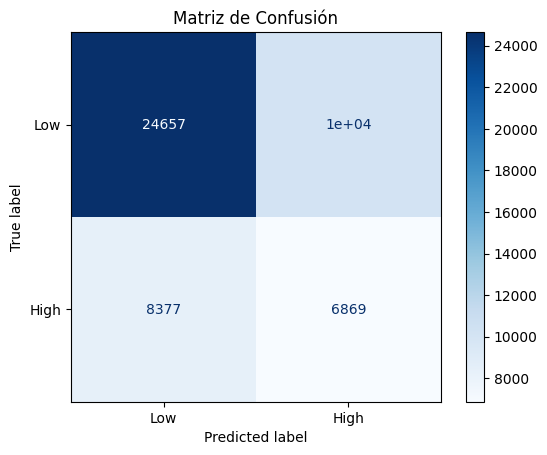

In [19]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
y_true = df_test["Real_Class"]
y_pred = df_test["Predicted_Class"]

# Calcular matriz de confusión
cm = confusion_matrix(y_true, y_pred, labels=[0,1])

# Mostrar matriz de confusión
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Low", "High"])
disp.plot(cmap=plt.cm.Blues)
plt.title("Matriz de Confusión")
plt.show()

El modelo acierta muy bien cuando la clase real es Low.

Pero confunde bastante cuando la clase real es High:

Predice Low cuando es High → 8377 errores.

Solo acierta 6869 casos High.

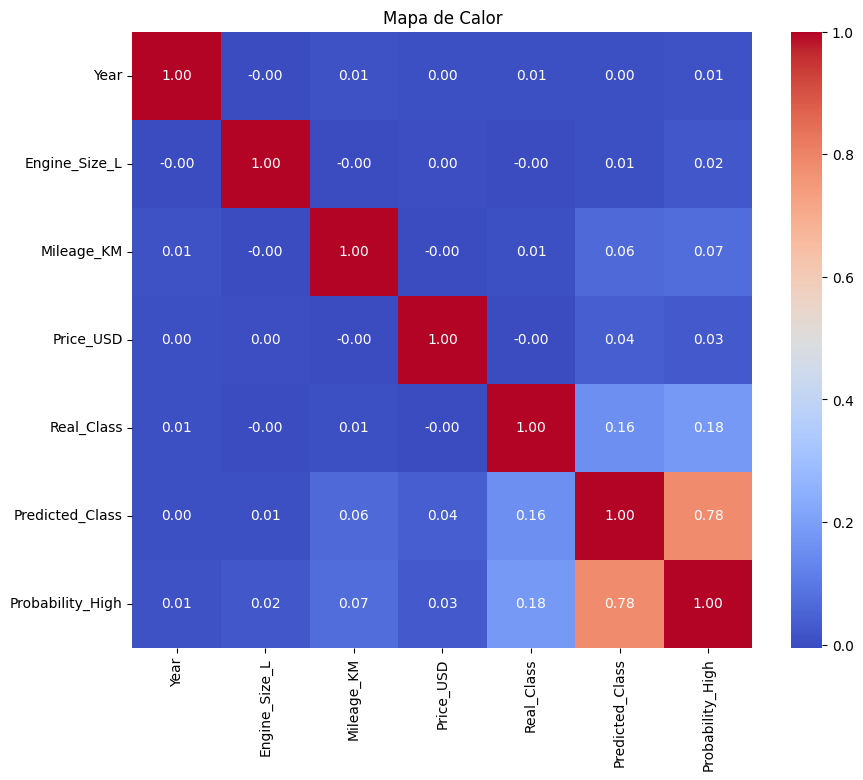

In [25]:
numerical_cols = df_test.select_dtypes(include=np.number)
correlation_matrix = numerical_cols.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Mapa de Calor')
plt.show()

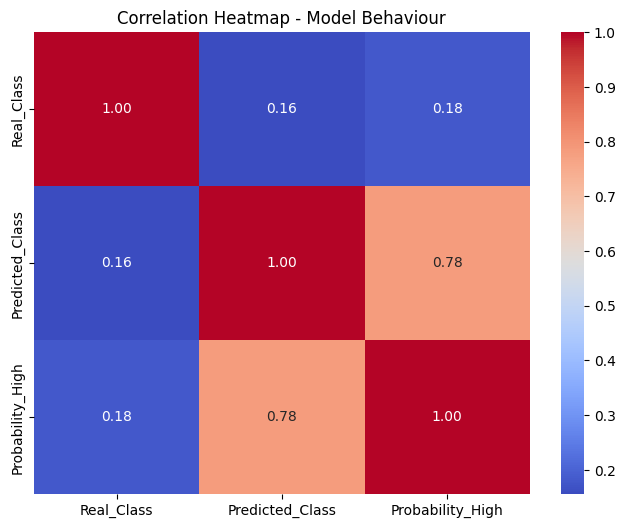

In [ ]:
model_cols = df_test[['Real_Class', 'Predicted_Class', 'Probability_High']]
corr_model = model_cols.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_model, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap - Model Behaviour')
plt.show()

El modelo muestra una baja correlación entre las clases reales y las predicciones, lo que indica un desempeño limitado (cant de datos). Sin embargo, existe una alta coherencia entre la clase predecida y la probabilidad.

## REAL VS PREDICCION


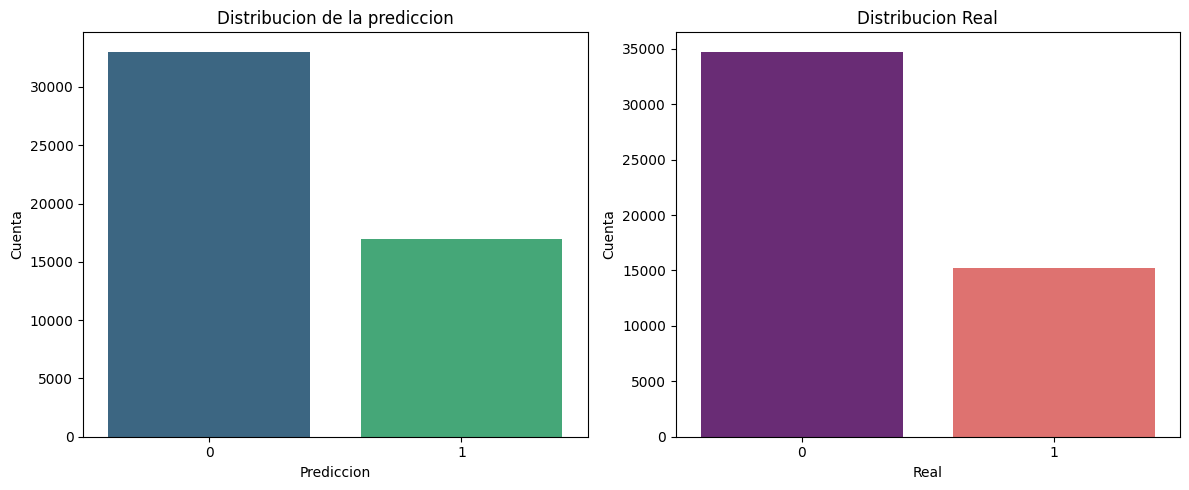

In [7]:
predicted_counts = df_test['Predicted_Class'].value_counts().sort_index()
real_counts = df_test['Real_Class'].value_counts().sort_index()
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Prediccion
sns.barplot(x=predicted_counts.index, y=predicted_counts.values, ax=axes[0], palette='viridis', hue=predicted_counts.index, legend=False)
axes[0].set_title('Distribucion de la prediccion')
axes[0].set_xlabel('Prediccion')
axes[0].set_ylabel('Cuenta')
axes[0].ticklabel_format(style='plain', axis='y')

# Real
sns.barplot(x=real_counts.index, y=real_counts.values, ax=axes[1], palette='magma', hue=real_counts.index, legend=False)
axes[1].set_title('Distribucion Real')
axes[1].set_xlabel('Real')
axes[1].set_ylabel('Cuenta')
axes[1].ticklabel_format(style='plain', axis='y') 

plt.tight_layout()
plt.show()

El modelo predice más la clase (1) de las que realmente existen y subestima la clase negativa (0)

## % de Error 


TN (True Negative - Verdadero Negativo): El modelo predijo correctamente la clase negativa (0). Predijo que un coche no era de lujo y no lo es.

FP (False Positive - Falso Positivo): El modelo predijo incorrectamente la clase positiva (1.0). Error 'Tipo I'. 
El modelo predijo que un coche era de lujo, no lo era. (Falsamente predicho positivo).

FN (False Negative - Falso Negativo): El modelo predijo incorrectamente la clase negativa (0.1). Error de 'Tipo II'. 
El modelo predijo que un coche no era de lujo, pero en realidad sí (Falsamente predicho como negativo).

TP (True Positive - Verdadero Positivo): El modelo predijo correctamente la clase positiva(1).
El modelo predijo que un coche era de lujo, y en realidad sí lo era.

In [ ]:
cm = confusion_matrix(df_test['Real_Class'], df_test['Predicted_Class'])
TN, FP, FN, TP = cm.ravel()

# Calcular reales
total_real_class_0 = TN + FP
total_real_class_1 = FN + TP

percentage_error_class_0 = (FP / total_real_class_0) * 100 if total_real_class_0 > 0 else 0

percentage_error_class_1 = (FN / total_real_class_1) * 100 if total_real_class_1 > 0 else 0

error_percentages = pd.DataFrame({
    'Real Class': [0, 1],
    'Percentage of Errors': [percentage_error_class_0, percentage_error_class_1]
    })

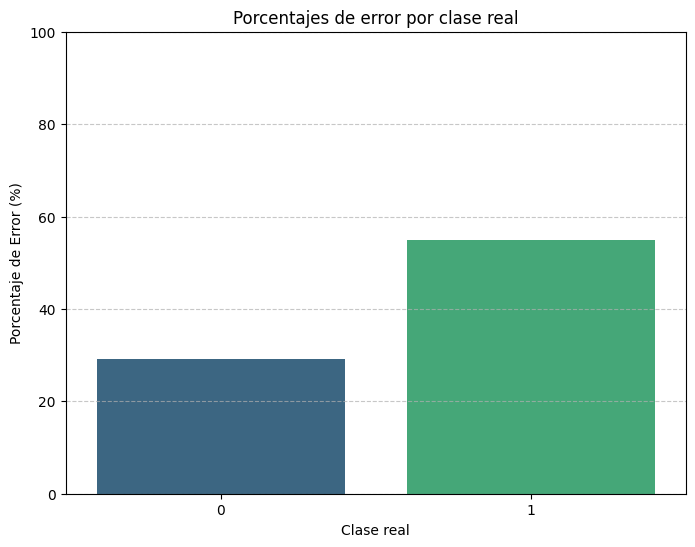

In [ ]:
plt.figure(figsize=(8, 6))
sns.barplot(x='Real Class', y='Percentage of Errors', data=error_percentages, palette='viridis', hue='Real Class', legend=False)
plt.title('Porcentajes de error por clase real')
plt.xlabel('Clase real')
plt.ylabel('Porcentaje de Error (%)')
plt.ylim(0, 100) # Ensure y-axis goes from 0 to 100%
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

## CURVA ROC

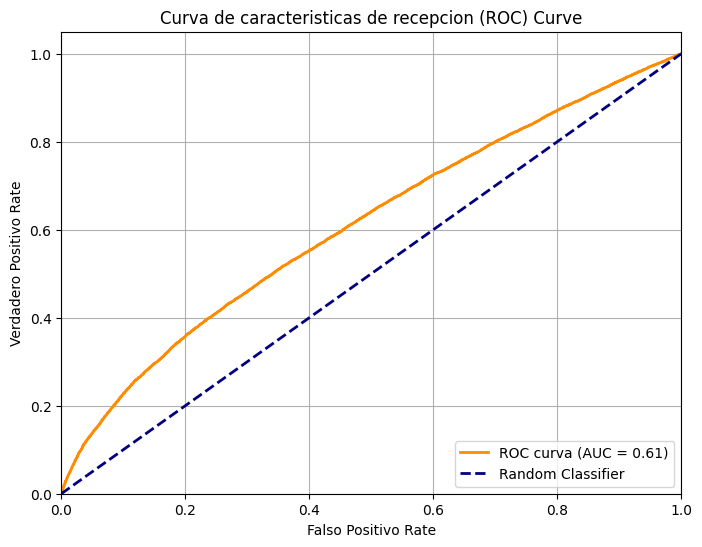

In [ ]:
true_labels = df_test['Real_Class']
predicted_probabilities = df_test['Probability_High']
# Rango
fpr, tpr, thresholds = roc_curve(true_labels, predicted_probabilities)

roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curva (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Classifier')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Falso Positivo Rate')
plt.ylabel('Verdadero Positivo Rate')
plt.title('Curva de caracteristicas de recepcion (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

El modelo se le dificulta distinguir las clases positiva y negativa.

## Analisis por umbral

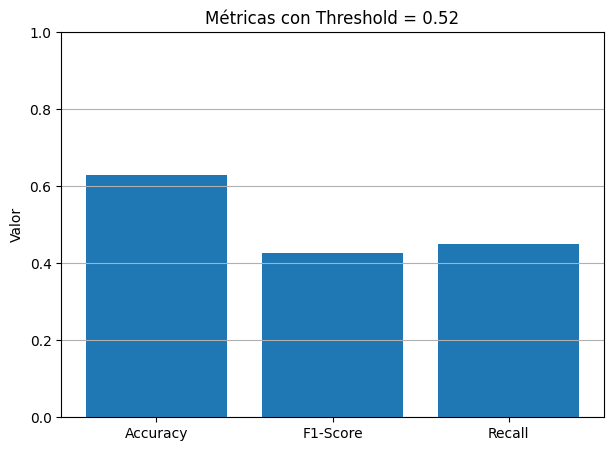

In [30]:
threshold = 0.52
predicted_classes = (predicted_probabilities >= threshold).astype(int)
acc = accuracy_score(true_labels, predicted_classes)
f1 = f1_score(true_labels, predicted_classes, zero_division=0)
rec = recall_score(true_labels, predicted_classes, zero_division=0)
metric_names = ['Accuracy', 'F1-Score', 'Recall']
metric_values = [acc, f1, rec]

plt.figure(figsize=(7,5))
plt.bar(metric_names, metric_values)
plt.ylim([0,1])
plt.title(f'Métricas con Threshold = {threshold}')
plt.ylabel('Valor')
plt.grid(axis='y')
plt.show()

Tenemos un umbral de 0.52, su capacidad para identificar correctamente la clase positiva (recall) es limitada, y el equilibrio entre precisión y recall (F1-score) es bajo. Indicando que el modelo no es muy eficaz para detectar la clase positiva.